# Dépendance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import os

# Chargement du dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Projet/ADD0')
print("Répertoire courant :", os.getcwd())

Répertoire courant : /content/drive/MyDrive/Projet/ADD0


In [4]:
!ls data

pokemon_images	pokemon_train_12k.csv  pokemon_train.csv  processed_12k


In [5]:
def load_dataset(csv_path):
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"Fichier CSV introuvable : {csv_path}")
    df = pd.read_csv(csv_path)
    if df.empty:
        raise ValueError("Le dataset est vide.")
    return df

# Afficher quelques lignes aléatoires

In [6]:
def show_sample_entries(df, n=5):
    display(df.sample(n))

# Graphique de distribution des types

In [7]:
def plot_type_distribution(df, top_n=15):
    type_counts = df['type'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=type_counts.head(top_n).index, y=type_counts.head(top_n).values)
    plt.xticks(rotation=45)
    plt.title("Distribution des types de Pokémon")
    plt.xlabel("Type")
    plt.ylabel("Nombre d’images")
    plt.tight_layout()
    plt.show()

# Affichage de captions aléatoires

In [8]:
def show_random_captions(df, n=5):
    print("Exemples de captions :\n")
    for _, row in df.sample(n).iterrows():
        print(f"- {row['name']}: {row['caption']}")

# Affichage d’images aléatoires

In [9]:
def show_sample_images(df, n=5):
    sample_df = df.sample(n)
    plt.figure(figsize=(15, 10))
    for i, (_, row) in enumerate(sample_df.iterrows()):
        try:
            img = Image.open(row['image_path'])
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.title(row['name'])
            plt.axis('off')
        except Exception as e:
            print(f"Erreur d’ouverture pour {row['image_path']}: {e}")
    plt.tight_layout()
    plt.show()

# Heatmap de co-occurrence type1 / type2

In [10]:
def plot_type_cooccurrence_from_combined(df):
    if 'type' not in df.columns:
        print("Colonne 'type' absente.")
        return

    # Séparer les types
    split_types = df['type'].str.split("/", expand=True)
    df['type1'] = split_types[0]
    df['type2'] = split_types[1] if split_types.shape[1] > 1 else None

    # Co-occurrence
    co_df = df[['type1', 'type2']].dropna()
    co_matrix = pd.crosstab(co_df['type1'], co_df['type2'])

    plt.figure(figsize=(12, 10))
    sns.heatmap(co_matrix, cmap='YlGnBu', annot=False)
    plt.title("Co-occurrence entre type1 et type2")
    plt.xlabel("Type 2")
    plt.ylabel("Type 1")
    plt.tight_layout()
    plt.show()

# Dataset 1k

,name,image_path,type,caption
279,ralts,data/pokemon_images/processed/pokemon_0279.png,Psychic/Fairy,"ralts, a Psychic/Fairy type Feeling Pokémon. R..."
7,wartortle,data/pokemon_images/processed/pokemon_0007.png,Water,"wartortle, a Water type Turtle Pokémon. Wartor..."
775,turtonator,data/pokemon_images/processed/pokemon_0775.png,Fire/Dragon,"turtonator, a Fire/Dragon type Blast Turtle Po..."
290,ninjask,data/pokemon_images/processed/pokemon_0290.png,Bug/Flying,"ninjask, a Bug/Flying type Ninja Pokémon. Ninj..."
317,carvanha,data/pokemon_images/processed/pokemon_0317.png,Water/Dark,"carvanha, a Water/Dark type Savage Pokémon. Ca..."


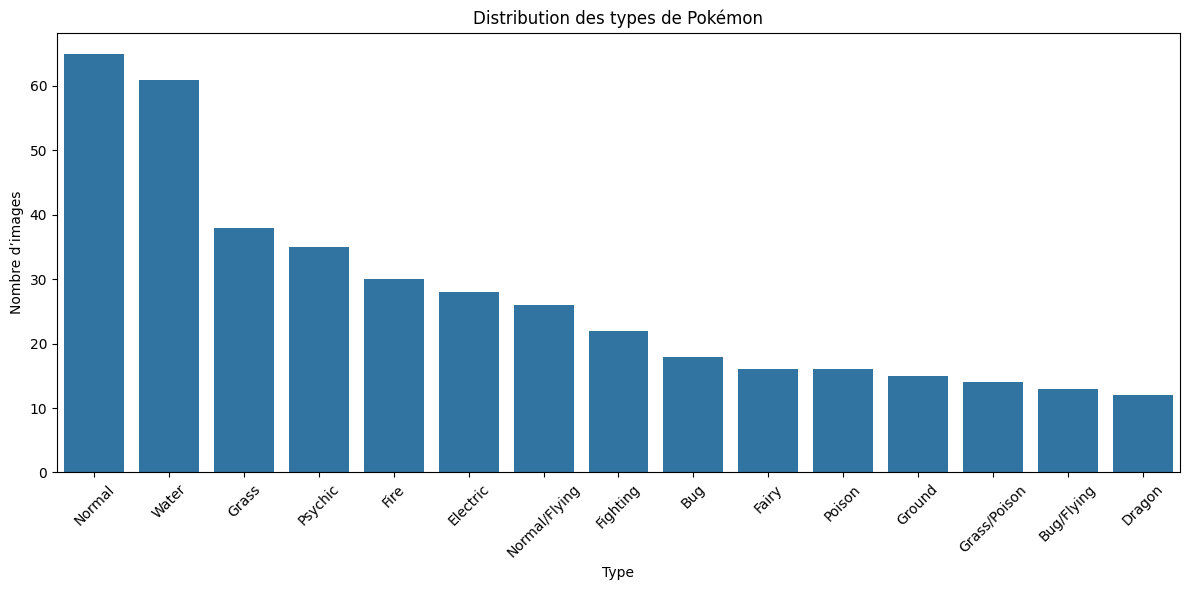

Exemples de captions :

- beedrill: beedrill, a Bug/Poison type Poison Bee Pokémon. Beedrill is a menacing Pokémon with sharp stingers and vibrant yellow and black stripes reminiscent of a deadly bee.
- nihilego: nihilego, a Rock/Poison type Parasite Pokémon. Nihilego is a mesmerizing creature with translucent tentacles and a body that resembles a floating rock, exuding an eerie and mysterious aura.
- mudbray: mudbray, a Ground type Donkey Pokémon. Mudbray is a sturdy and determined donkey Pokémon with a coat of brown fur and a distinctive mud-splattered mane.
- hoothoot: hoothoot, a Normal/Flying type Owl Pokémon. Hoothoot is a small owl Pokémon with large, round eyes that glow in the dark.
- exeggutor: exeggutor, a Grass/Psychic type Coconut Pokémon. Exeggutor is a towering Pokémon with three heads resembling coconuts, giving it the appearance of a tropical palm tree.


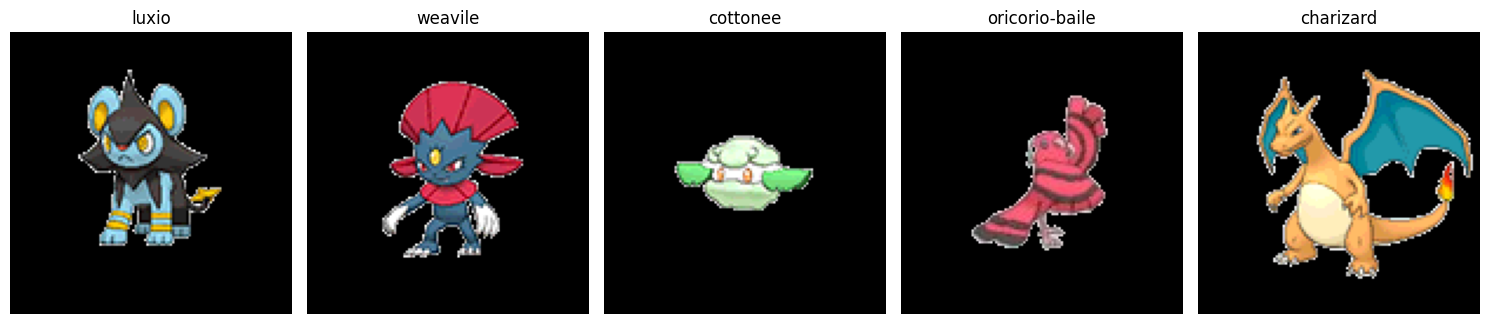

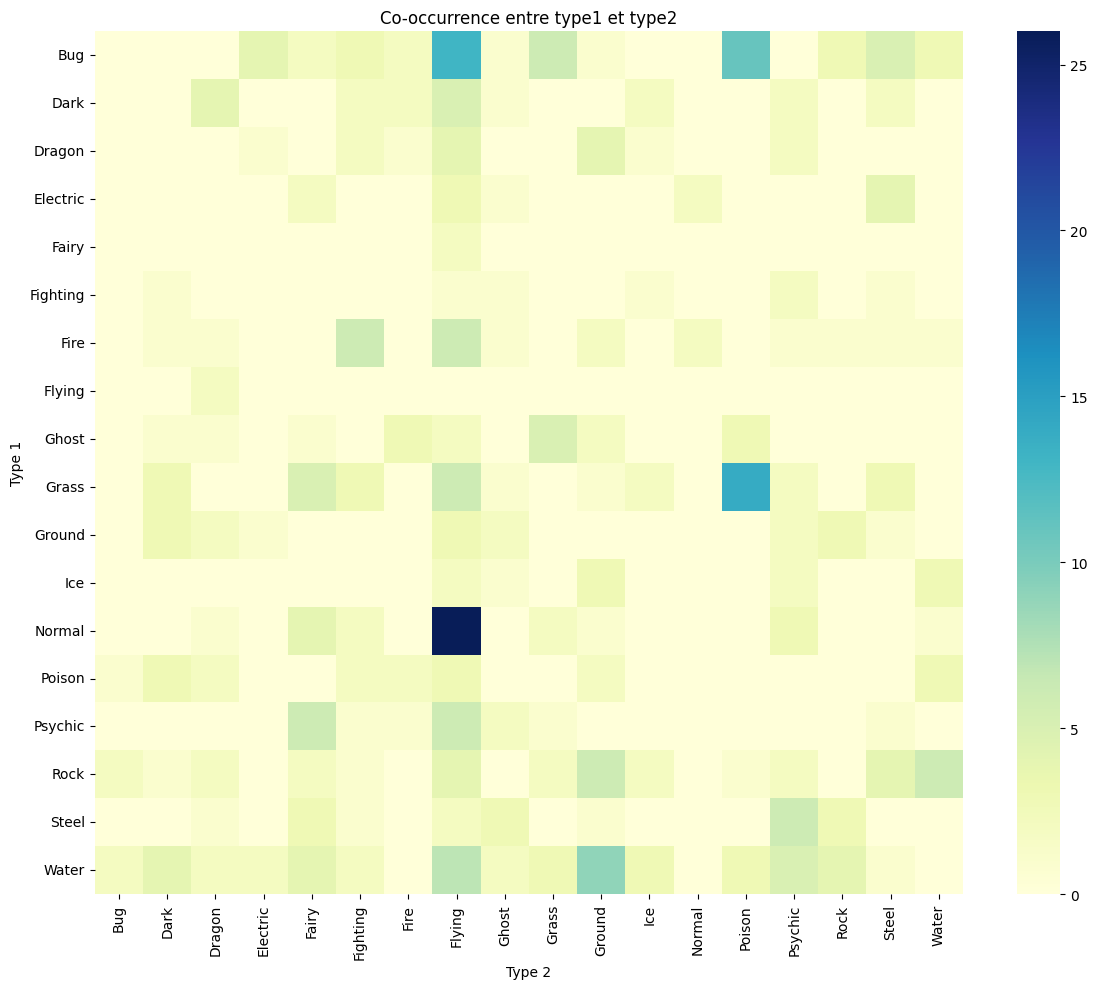

In [26]:
df = load_dataset("data/pokemon_train.csv")

show_sample_entries(df)
plot_type_distribution(df)
show_random_captions(df)
show_sample_images(df)
plot_type_cooccurrence_from_combined(df)

# Dataset 12k

,name,image_path,type,caption
6720,bronzong,data/processed_12k/pokemon12k_06726.png,Steel/Psychic,"bronzong, a Steel/Psychic type Bronze Bell Pok..."
9211,haxorus,data/processed_12k/pokemon12k_09224.png,Dragon,"haxorus, a Dragon type Axe Jaw Pokémon. Haxoru..."
1339,magnemite,data/processed_12k/pokemon12k_01339.png,Electric/Steel,"magnemite, a Electric/Steel type Magnet Pokémo..."
9615,thundurus-incarnate,data/processed_12k/pokemon12k_09628.png,Electric/Flying,"thundurus-incarnate, a Electric/Flying type Un..."
4500,whismur,data/processed_12k/pokemon12k_04502.png,Normal,"whismur, a Normal type Whisper Pokémon. Whismu..."


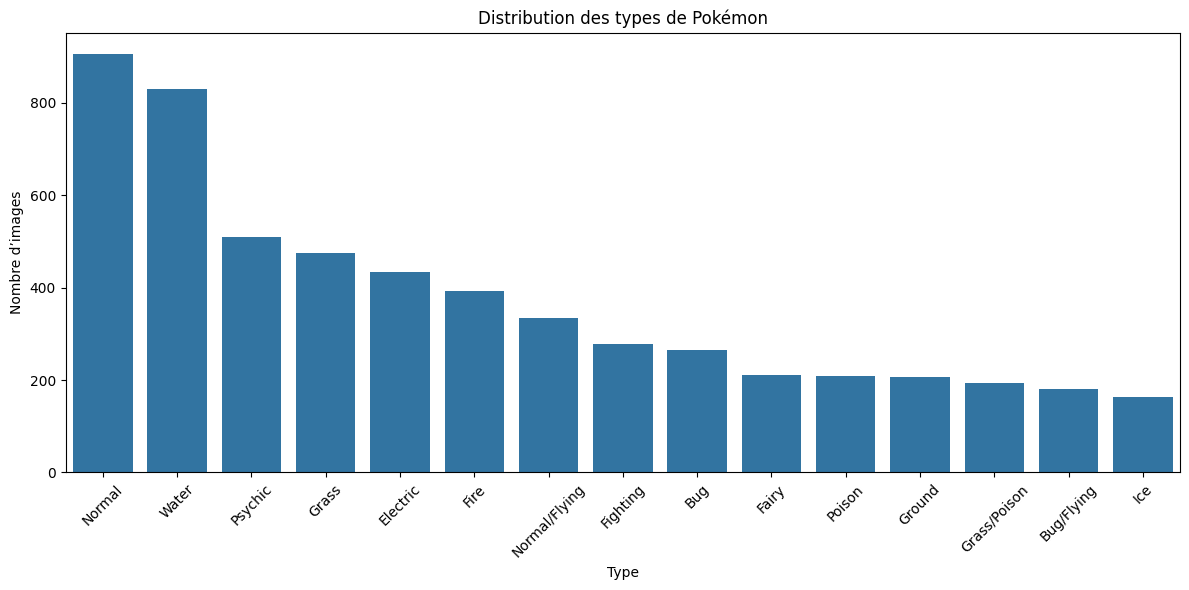

Exemples de captions :

- fearow: fearow, a Normal/Flying type Beak Pokémon. Fearow is a majestic bird Pokémon with a sharp beak and fierce eyes, ready to swoop down on its prey with precision.
- pikachu: pikachu, a Electric type Mouse Pokémon. Pikachu is a small, yellow mouse Pokémon with rosy cheeks and long, pointed ears.
- avalugg: avalugg, a Ice type Iceberg Pokémon. Avalugg is a massive iceberg Pokémon with a sturdy, icy blue shell that resembles a floating glacier.
- whirlipede: whirlipede, a Bug/Poison type Curlipede Pokémon. Whirlipede is a sleek and shiny bug Pokémon with a segmented body and a vibrant purple color scheme, while Curlipede is a smaller, cuter version with a coiled tail and a playful demeanor.
- sandshrew: sandshrew, a Ground type Mouse Pokémon. Sandshrew is a small, armor-plated creature resembling a mix between a mouse and an armadillo, with sharp claws and a sandy yellow fur coat.


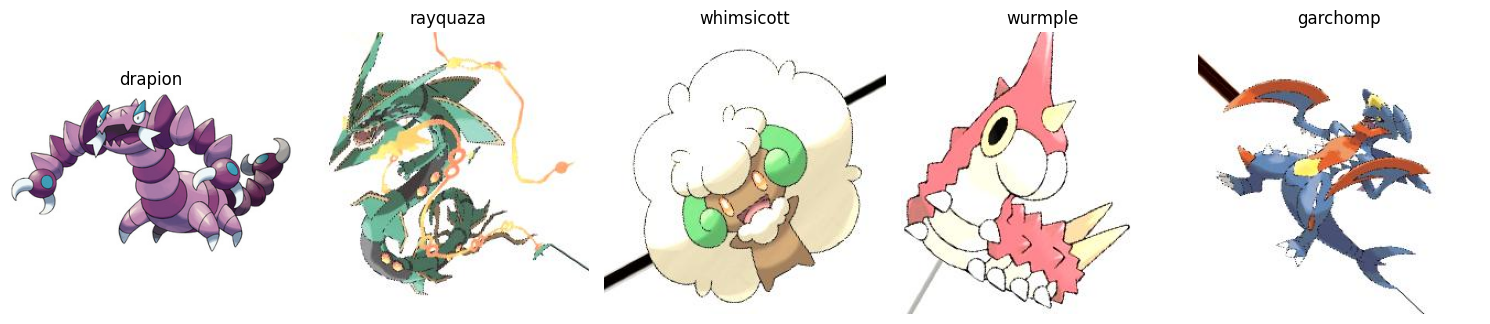

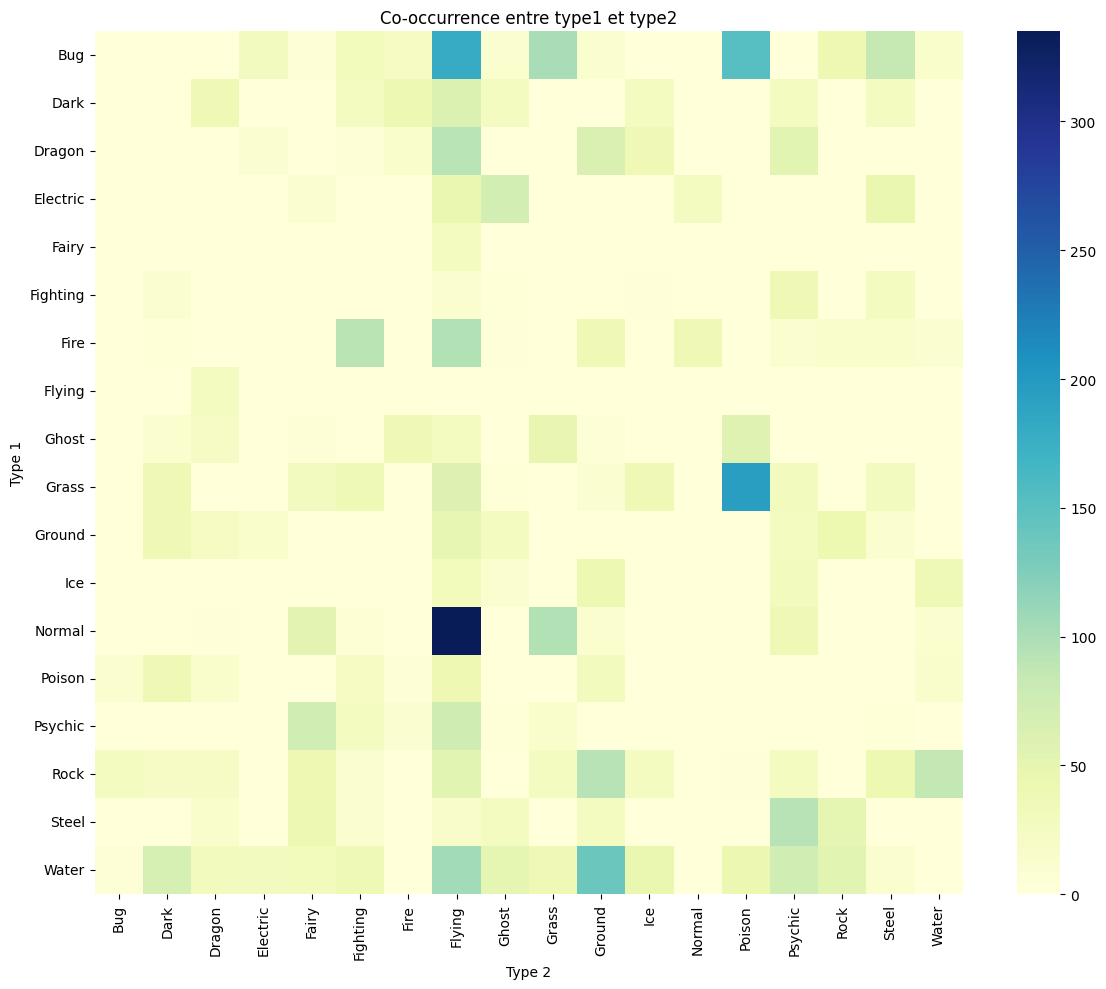

In [21]:
df12k = load_dataset("data/pokemon_train_12k.csv")

show_sample_entries(df12k)
plot_type_distribution(df12k)
show_random_captions(df12k)
show_sample_images(df12k)
plot_type_cooccurrence_from_combined(df12k)